# Using TensorFlow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [4]:
# train val split maintaining class distribution
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [5]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (40000, 32, 32, 3)
y_train shape: (40000, 1)
X_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 1)


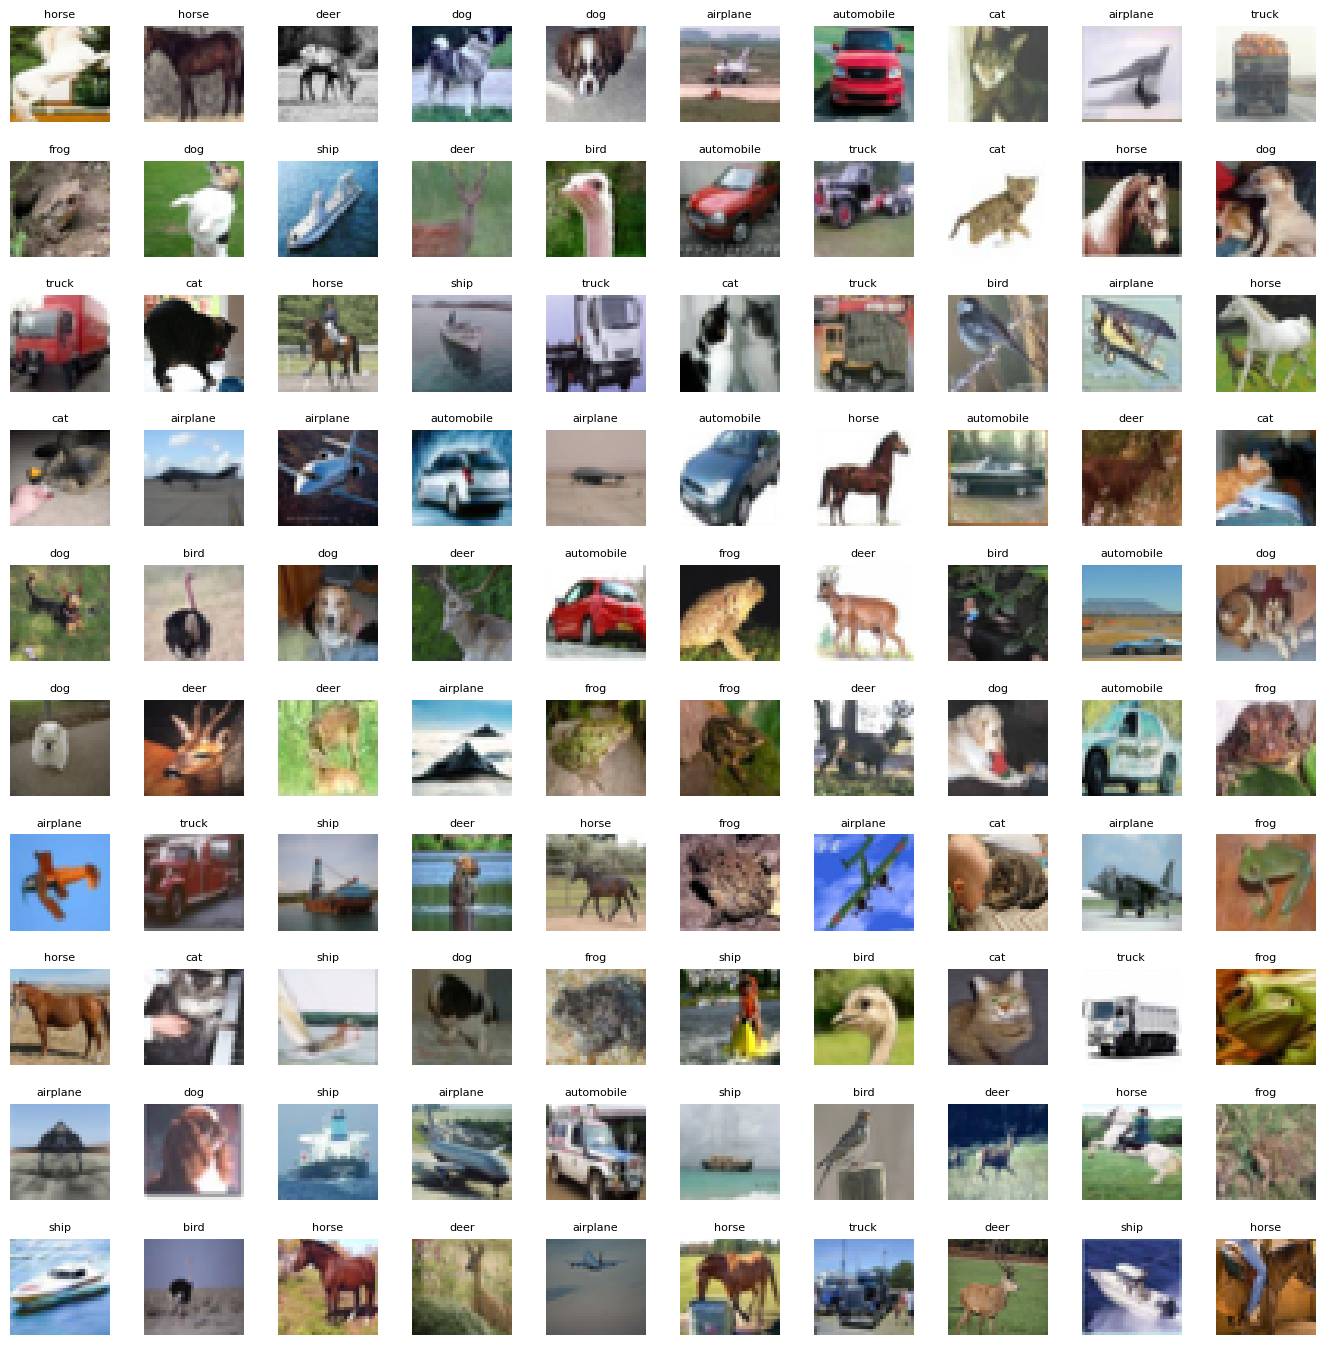

In [6]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Define the dimensions of the plot grid  (10x10)
W_grid = 10
L_grid = 10

# subplot return the figure object and axes object
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index].item())
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

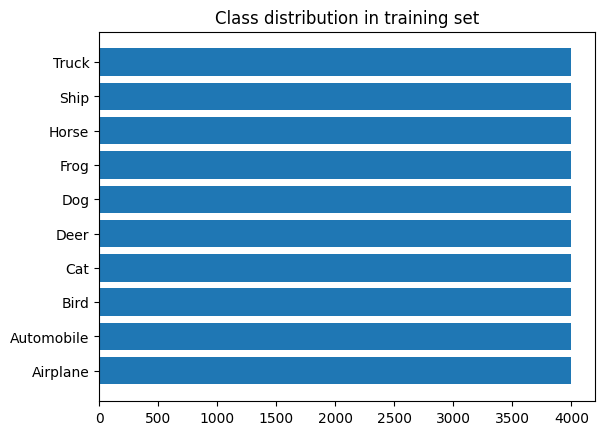

In [7]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in Validation set')

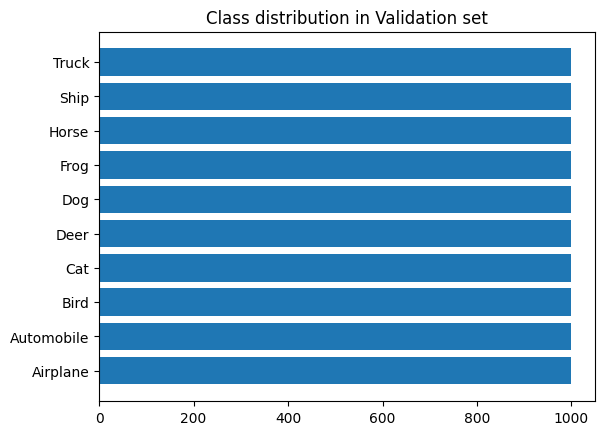

In [8]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in Validation set')

In [ ]:
# Scale the data
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_val = to_categorical(y_val, 10)
y_cat_test = to_categorical(y_test, 10)

In [ ]:
def resnet_block(inputs, filters, strides=1):
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, (3, 3), strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    if strides != 1 or inputs.shape[-1] != filters:
        inputs = layers.Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)(inputs)
        inputs = layers.BatchNormalization()(inputs)

    x = layers.add([x, inputs])
    x = layers.ReLU()(x)
    return x

def build_resnet18(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), strides=1, padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = resnet_block(x, 64)
    x = resnet_block(x, 64)

    x = resnet_block(x, 128, strides=2)
    x = resnet_block(x, 128)

    x = resnet_block(x, 256, strides=2)
    x = resnet_block(x, 256)

    x = resnet_block(x, 512, strides=2)
    x = resnet_block(x, 512)

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Build and compile the model
model = build_resnet18()
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │      1,728 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │     36,864 │ re_lu[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │     36,864 │ re_lu_1[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ re_lu[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 32, 32,    │          0 │ add[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 32, 32,    │     36,864 │ re_lu_2[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     36,864 │ re_lu_3[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 32, 32,    │          0 │ batch_normalizat

 Total params: 11,183,562 (42.66 MB)

 Trainable params: 11,173,962 (42.63 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_train, y_cat_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_cat_val),
)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 901s 1s/step - accuracy: 0.4489 - loss: 1.5065 - val_accuracy: 0.4530 - val_loss: 2.4097
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 934s 1s/step - accuracy: 0.6977 - loss: 0.8526 - val_accuracy: 0.6106 - val_loss: 1.2002
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 972s 2s/step - accuracy: 0.7825 - loss: 0.6141 - val_accuracy: 0.7038 - val_loss: 0.9346
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 919s 1s/step - accuracy: 0.8329 - loss: 0.4797 - val_accuracy: 0.7863 - val_loss: 0.6219
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 948s 2s/step - accuracy: 0.8780 - loss: 0.3545 - val_accuracy: 0.7675 - val_loss: 0.7277
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 924s 1s/step - accuracy: 0.9070 - loss: 0.2645 - val_accuracy: 0.7799 - val_loss: 0.7727
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 922s 1s/step - accuracy: 0.9390 - loss: 0.1792 - val_accuracy: 0.7562 - val_loss: 0.8895
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 918s 1s/step - accuracy: 0.9528 - loss: 0.1352 - val_accu

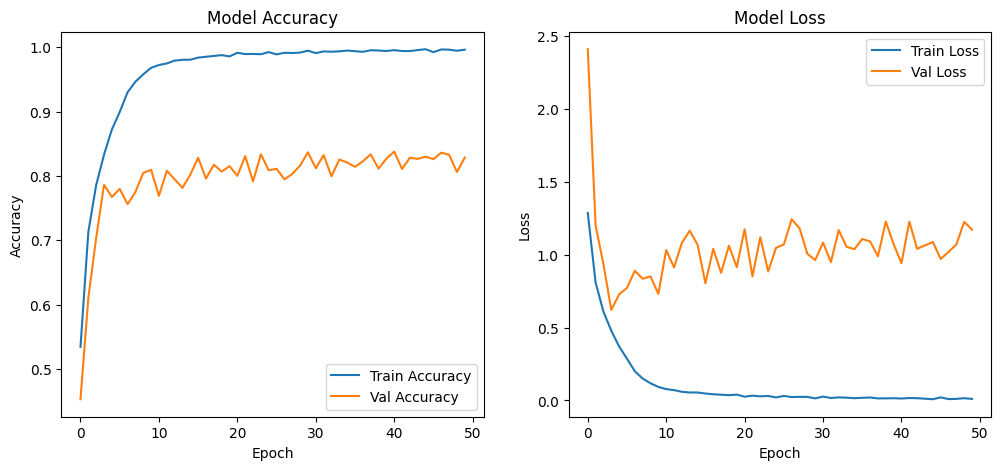

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Using Pytorch

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, models
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from torchsummary import summary

# Experimentation

# Optimizer SGD, LR = 0.0001, no image resizing, batch size 256

Using device: cuda
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/30
Train Loss: 2.4797, Train Acc: 10.51%
Val Loss: 2.4227, Val Acc: 11.94%
Epoch 2/30
Train Loss: 2.4005, Train Acc: 11.89%
Val Loss: 2.3806, Val Acc: 12.59%
Epoch 3/30
Train Loss: 2.3565, Train Acc: 13.46%
Val Loss: 2.3284, Val Acc: 14.38%
Epoch 4/30
Train Loss: 2.3146, Train Acc: 14.64%
Val Loss: 2.2990, Val Acc: 15.65%
Epoch 5/30
Train Loss: 2.2898, Train Acc: 15.89%
Val Loss: 2.2730, Val Acc: 16.76%
Epoch 6/30
Train Loss: 2.2645, Train Acc: 16.91%
Val Loss: 2.2488, Val Acc: 17.60%
Epoch 7/30
Train Loss: 2.2379, Train Acc: 17.94%
Val Loss: 2.2396, Val Acc: 18.17%
Epoch 8/30
Train Loss: 2.2169, Train Acc: 18.85%
Val Loss: 2.2022, Val Acc: 19.50%
Epoch 9/30
Train Loss: 2.1990, Train Acc: 19.85%
Val Loss: 2.1840, Val Acc: 20.09%
Epoch 10/30
Train Loss: 2.1814, Train Acc: 20.19%
Val Loss: 2.1630, Val Acc: 20.92%
Epoch 11/30
Train Loss: 2.1597, Train Acc: 21.21%
Val Loss: 2.1573, Val Ac

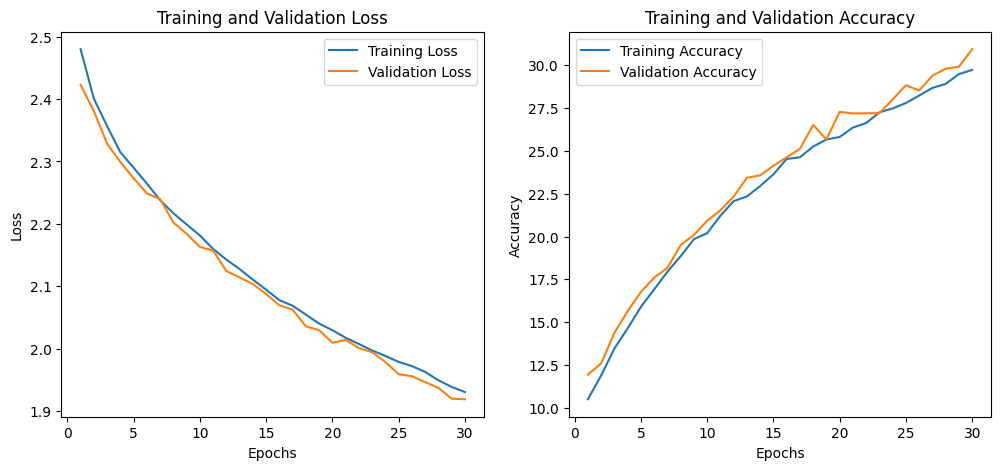

Classification Report:
              precision    recall  f1-score   support

    airplane       0.40      0.38      0.39      1000
  automobile       0.34      0.37      0.35      1000
        bird       0.23      0.16      0.19      1000
         cat       0.19      0.14      0.16      1000
        deer       0.29      0.36      0.32      1000
         dog       0.26      0.25      0.26      1000
        frog       0.32      0.36      0.34      1000
       horse       0.27      0.23      0.25      1000
        ship       0.34      0.45      0.39      1000
       truck       0.33      0.34      0.33      1000

    accuracy                           0.30     10000
   macro avg       0.30      0.30      0.30     10000
weighted avg       0.30      0.30      0.30     10000

Confusion Matrix:
[[382  69  46  25  28  26  30  37 277  80]
 [ 80 366  17  61  11  56  36  60 127 186]
 [ 89  59 160  64 221  79 131  75  79  43]
 [ 35  83  92 141 132 171 138  90  49  69]
 [ 37  32 113  59 363  66 17

In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
# Define transforms
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# split train dataset into train and validation sets (80/20) using random split

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=8,pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False, num_workers=8, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False, num_workers=8, pin_memory=True)

# Initialize ResNet-18 model_exp
model_exp = models.resnet18(weights=None)  # No pretrained weights

# Modify the final fully connected layer to match CIFAR-10's classes
model_exp.fc = nn.Linear(model_exp.fc.in_features, 10)

# Move the model_exp to the GPU
model_exp = model_exp.to(device, non_blocking=True)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_exp.parameters(), lr=0.0001)

def train(model_exp, loader, criterion, optimizer):
    model_exp.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in loader:
        inputs, labels = inputs.to(device, non_blocking = True), labels.to(device, non_blocking = True)

        optimizer.zero_grad()
        outputs = model_exp(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)
    return running_loss / total, 100. * correct / total

def validate(model_exp, loader, criterion):
    model_exp.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device, non_blocking = True), labels.to(device, non_blocking = True)

            outputs = model_exp(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
    return running_loss / total, 100. * correct / total

num_epochs = 30
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model_exp, train_loader, criterion, optimizer)
    val_loss, val_acc = validate(model_exp, test_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

# Plot training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label="Training Loss")
plt.plot(range(1, num_epochs+1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label="Training Accuracy")
plt.plot(range(1, num_epochs+1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.show()

# Test set evaluation
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Make predictions on the test set
model_exp.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_exp(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=train_dataset.dataset.classes))

print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

## Lr Changed to 0.001, batch size reduced to 128

Using device: cuda
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/30
Train Loss: 2.2166, Train Acc: 18.91%
Val Loss: 2.0481, Val Acc: 25.30%
Epoch 2/30
Train Loss: 1.9675, Train Acc: 27.93%
Val Loss: 1.8884, Val Acc: 29.89%
Epoch 3/30
Train Loss: 1.8448, Train Acc: 31.94%
Val Loss: 1.7930, Val Acc: 33.53%
Epoch 4/30
Train Loss: 1.7635, Train Acc: 34.95%
Val Loss: 1.7199, Val Acc: 37.21%
Epoch 5/30
Train Loss: 1.7009, Train Acc: 37.07%
Val Loss: 1.6598, Val Acc: 38.77%
Epoch 6/30
Train Loss: 1.6528, Train Acc: 39.16%
Val Loss: 1.6167, Val Acc: 40.01%
Epoch 7/30
Train Loss: 1.6098, Train Acc: 40.59%
Val Loss: 1.5900, Val Acc: 41.49%
Epoch 8/30
Train Loss: 1.5855, Train Acc: 41.72%
Val Loss: 1.5654, Val Acc: 42.69%
Epoch 9/30
Train Loss: 1.5620, Train Acc: 42.72%
Val Loss: 1.5373, Val Acc: 43.45%
Epoch 10/30
Train Loss: 1.5319, Train Acc: 43.87%
Val Loss: 1.5103, Val Acc: 44.66%
Epoch 11/30
Train Loss: 1.5124, Train Acc: 44.56%
Val Loss: 1.4856, Val Ac

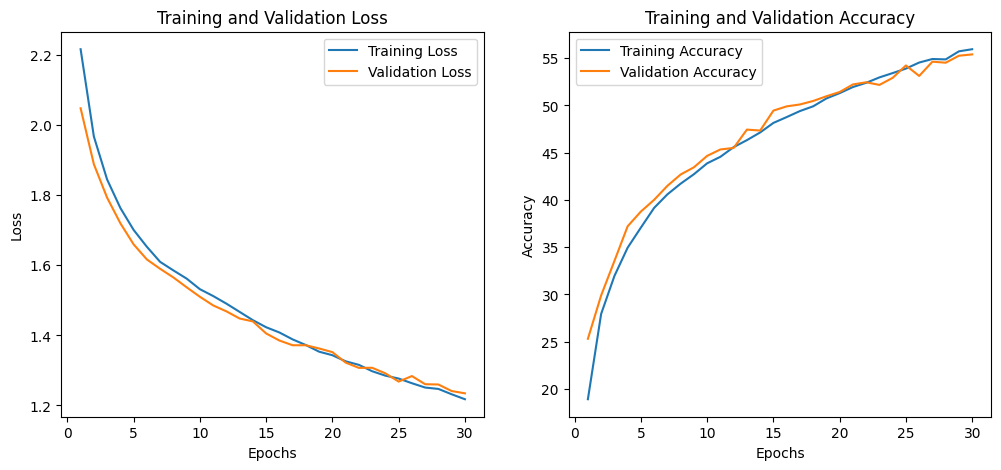

Classification Report:
              precision    recall  f1-score   support

    airplane       0.59      0.60      0.60      1000
  automobile       0.62      0.68      0.65      1000
        bird       0.41      0.42      0.41      1000
         cat       0.41      0.30      0.35      1000
        deer       0.50      0.41      0.45      1000
         dog       0.47      0.51      0.49      1000
        frog       0.58      0.73      0.65      1000
       horse       0.62      0.61      0.61      1000
        ship       0.69      0.69      0.69      1000
       truck       0.61      0.60      0.61      1000

    accuracy                           0.56     10000
   macro avg       0.55      0.56      0.55     10000
weighted avg       0.55      0.56      0.55     10000

Confusion Matrix:
[[603  49  84  15  16   7  23  14 135  54]
 [ 56 683  16  16   8   6  16  18  43 138]
 [ 89  17 416  66 115  96 123  36  20  22]
 [ 22  27 116 303  69 249 134  48  13  19]
 [ 35  13 156  58 413  53 12

In [50]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
# Define transforms
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# split train dataset into train and validation sets (80/20) using random split

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4,pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)

# Initialize ResNet-18 model_exp
model_exp = models.resnet18(weights=None)  # No pretrained weights

# Modify the final fully connected layer to match CIFAR-10's classes
model_exp.fc = nn.Linear(model_exp.fc.in_features, 10)

# Move the model_exp to the GPU
model_exp = model_exp.to(device, non_blocking=True)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_exp.parameters(), lr=0.001)

def train(model_exp, loader, criterion, optimizer):
    model_exp.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in loader:
        inputs, labels = inputs.to(device, non_blocking = True), labels.to(device, non_blocking = True)

        optimizer.zero_grad()
        outputs = model_exp(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)
    return running_loss / total, 100. * correct / total

def validate(model_exp, loader, criterion):
    model_exp.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device, non_blocking = True), labels.to(device, non_blocking = True)

            outputs = model_exp(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
    return running_loss / total, 100. * correct / total

num_epochs = 30
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model_exp, train_loader, criterion, optimizer)
    val_loss, val_acc = validate(model_exp, test_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

# Plot training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label="Training Loss")
plt.plot(range(1, num_epochs+1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label="Training Accuracy")
plt.plot(range(1, num_epochs+1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.show()

# Test set evaluation
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Make predictions on the test set
model_exp.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_exp(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=train_dataset.dataset.classes))

print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

## Changing the optimizer to ADAM

Using device: cuda
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/30
Train Loss: 1.5976, Train Acc: 42.03%
Val Loss: 1.3923, Val Acc: 49.81%
Epoch 2/30
Train Loss: 1.2476, Train Acc: 55.34%
Val Loss: 1.2435, Val Acc: 56.19%
Epoch 3/30
Train Loss: 1.0906, Train Acc: 61.37%
Val Loss: 1.1122, Val Acc: 59.82%
Epoch 4/30
Train Loss: 0.9807, Train Acc: 65.40%
Val Loss: 1.0395, Val Acc: 62.99%
Epoch 5/30
Train Loss: 0.8902, Train Acc: 68.55%
Val Loss: 0.9449, Val Acc: 68.24%
Epoch 6/30
Train Loss: 0.8364, Train Acc: 71.03%
Val Loss: 0.9287, Val Acc: 68.23%
Epoch 7/30
Train Loss: 0.7894, Train Acc: 72.50%
Val Loss: 0.8914, Val Acc: 69.07%
Epoch 8/30
Train Loss: 0.7514, Train Acc: 73.78%
Val Loss: 0.8028, Val Acc: 72.08%
Epoch 9/30
Train Loss: 0.7116, Train Acc: 75.26%
Val Loss: 0.8094, Val Acc: 71.82%
Epoch 10/30
Train Loss: 0.6801, Train Acc: 76.38%
Val Loss: 0.7908, Val Acc: 73.04%
Epoch 11/30
Train Loss: 0.6538, Train Acc: 77.24%
Val Loss: 0.7473, Val Ac

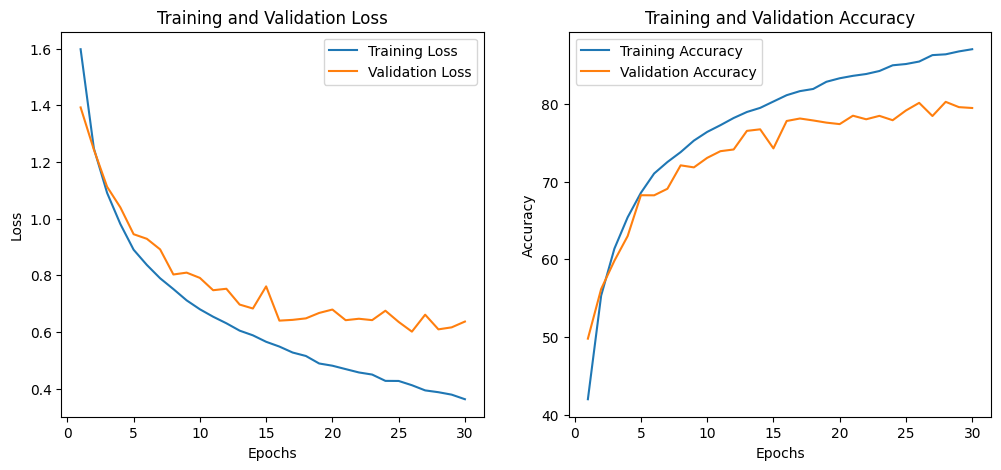

Classification Report:
              precision    recall  f1-score   support

    airplane       0.84      0.81      0.83      1000
  automobile       0.79      0.94      0.86      1000
        bird       0.73      0.75      0.74      1000
         cat       0.71      0.61      0.66      1000
        deer       0.82      0.75      0.78      1000
         dog       0.77      0.68      0.72      1000
        frog       0.80      0.89      0.85      1000
       horse       0.76      0.89      0.82      1000
        ship       0.92      0.85      0.88      1000
       truck       0.87      0.81      0.84      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

Confusion Matrix:
[[813  34  52   8  11   4  12   7  37  22]
 [  6 943   5   3   0   0   4   1   3  35]
 [ 34   9 754  27  47  24  60  35   4   6]
 [ 21  10  72 613  43 100  61  55  10  15]
 [ 10   6  45  36 752  25  4

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
# Define transforms
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# split train dataset into train and validation sets (80/20) using random split

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4,pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)

# Initialize ResNet-18 model_exp
model_exp = models.resnet18(weights=None)  # No pretrained weights

# Modify the final fully connected layer to match CIFAR-10's classes
model_exp.fc = nn.Linear(model_exp.fc.in_features, 10)

# Move the model_exp to the GPU
model_exp = model_exp.to(device, non_blocking=True)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_exp.parameters(), lr=0.001)

def train(model_exp, loader, criterion, optimizer):
    model_exp.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in loader:
        inputs, labels = inputs.to(device, non_blocking = True), labels.to(device, non_blocking = True)

        optimizer.zero_grad()
        outputs = model_exp(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)
    return running_loss / total, 100. * correct / total

def validate(model_exp, loader, criterion):
    model_exp.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device, non_blocking = True), labels.to(device, non_blocking = True)

            outputs = model_exp(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
    return running_loss / total, 100. * correct / total

num_epochs = 30
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model_exp, train_loader, criterion, optimizer)
    val_loss, val_acc = validate(model_exp, test_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

# Plot training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label="Training Loss")
plt.plot(range(1, num_epochs+1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label="Training Accuracy")
plt.plot(range(1, num_epochs+1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.show()

# Test set evaluation
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Make predictions on the test set
model_exp.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_exp(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=train_dataset.dataset.classes))

print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

## Checking whether the input size is creating any issues or some kind of reaching saturations.

In [12]:
model_exp = models.resnet18(weights=None)
model_exp.fc = nn.Linear(model_exp.fc.in_features, 10)
model_exp = model_exp.to(device)
summary(model_exp, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          36,864
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
       BasicBlock-11             [-1, 64, 8, 8]               0
           Conv2d-12             [-1, 64, 8, 8]          36,864
      BatchNorm2d-13             [-1, 64, 8, 8]             128
             ReLU-14             [-1, 6

## Changed image size and optimized the entire code for reduced time and complexity using torch cuda, also added LR scheduler, L2 regularization to address overfitting at the higher epochs and checking for early stopping conditions to mitigate the useless epochs which inturn reduces the overall time and make the code block more Robust.

Files already downloaded and verified
Epoch [1/25], LR: 0.001000, Train Loss: 1.4841, Train Acc: 0.4541, Val Loss: 1.1801, Val Acc: 0.5748
Epoch [2/25], LR: 0.001000, Train Loss: 0.9663, Train Acc: 0.6572, Val Loss: 1.0757, Val Acc: 0.6188
Epoch [3/25], LR: 0.001000, Train Loss: 0.7443, Train Acc: 0.7385, Val Loss: 0.7483, Val Acc: 0.7419
Epoch [4/25], LR: 0.001000, Train Loss: 0.6456, Train Acc: 0.7743, Val Loss: 0.9868, Val Acc: 0.6801
Epoch [5/25], LR: 0.001000, Train Loss: 0.5657, Train Acc: 0.8019, Val Loss: 0.6981, Val Acc: 0.7646
Epoch [6/25], LR: 0.001000, Train Loss: 0.5123, Train Acc: 0.8214, Val Loss: 0.5936, Val Acc: 0.8015
Epoch [7/25], LR: 0.001000, Train Loss: 0.4661, Train Acc: 0.8377, Val Loss: 0.5687, Val Acc: 0.8068
Epoch [8/25], LR: 0.001000, Train Loss: 0.4435, Train Acc: 0.8465, Val Loss: 0.7753, Val Acc: 0.7424
Epoch [9/25], LR: 0.001000, Train Loss: 0.4037, Train Acc: 0.8589, Val Loss: 0.5855, Val Acc: 0.8108
Epoch [10/25], LR: 0.001000, Train Loss: 0.3801, Trai

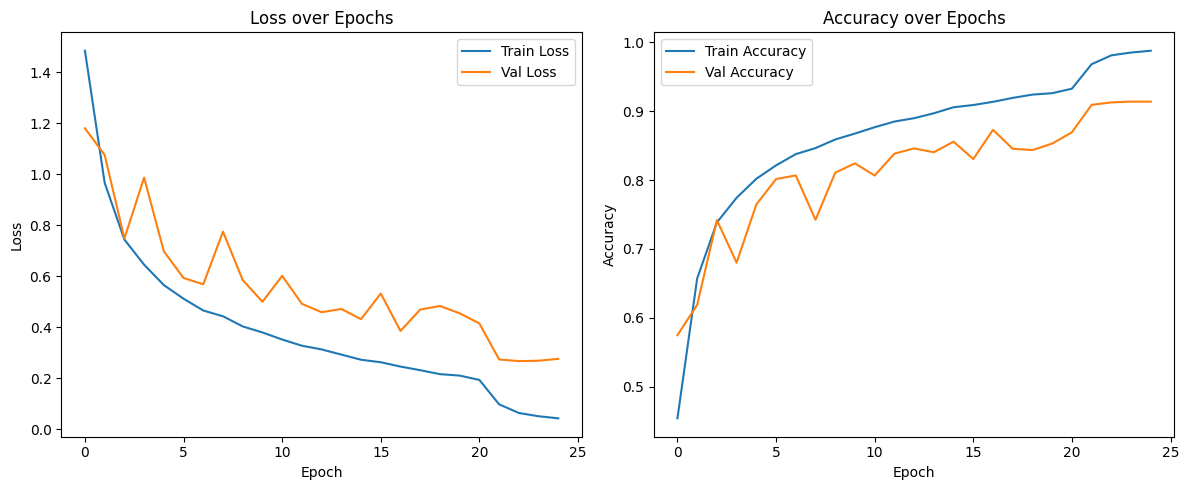

In [ ]:
# Clear CUDA cache to prevent memory errors and set device
torch.cuda.empty_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize(224),  # Resize CIFAR-10 images to 224x224 to match ResNet18 input size
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Get indices and labels of the dataset
indices = np.arange(len(train_dataset))
targets = np.array(train_dataset.targets)

# Perform stratified train-validation split (80:20)
train_indices, val_indices = train_test_split(indices, test_size=0.2, stratify=targets, random_state=42)

# Create subset datasets for training and validation
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Create DataLoaders
train_loader = DataLoader(train_subset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_subset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)

# Load ResNet18 model (without pretrained weights)
model = models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, 10)  # Since CIFAR-10 has 10 classes
model = model.to(device, non_blocking=True)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization with weight decay

# Scheduler to reduce learning rate when validation loss plateaus
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

# Early stopping parameters
early_stopping_patience = 7
best_val_loss = np.inf
early_stopping_counter = 0

# AMP: Initialize GradScaler for mixed precision training
scaler = torch.amp.GradScaler('cuda')

# Function to calculate accuracy
def accuracy(output, target):
    _, preds = torch.max(output, 1)
    return torch.sum(preds == target).item() / len(target)

# Training loop
num_epochs = 25
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
start_time = time.time()

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_train_loss = 0.0
    running_train_acc = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device, non_blocking = True), labels.to(device, non_blocking = True)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass with autocast for mixed precision
        with torch.amp.autocast('cuda'):
            outputs = model(images)
            loss = criterion(outputs, labels)
        
        # Backward pass with scaled gradients
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        # Calculate training statistics
        running_train_loss += loss.item() * images.size(0)
        running_train_acc += accuracy(outputs, labels) * images.size(0)
    
    train_loss = running_train_loss / len(train_loader.dataset)
    train_acc = running_train_acc / len(train_loader.dataset)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation phase
    model.eval()
    running_val_loss = 0.0
    running_val_acc = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device, non_blocking = True), labels.to(device, non_blocking = True)
            
            # Forward pass with autocast for mixed precision
            with torch.amp.autocast('cuda'):
                outputs = model(images)
                loss = criterion(outputs, labels)
            
            # Calculate validation statistics
            running_val_loss += loss.item() * images.size(0)
            running_val_acc += accuracy(outputs, labels) * images.size(0)
    
    val_loss = running_val_loss / len(val_loader.dataset)
    val_acc = running_val_acc / len(val_loader.dataset)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Print epoch statistics
    print(f'Epoch [{epoch+1}/{num_epochs}], LR: {optimizer.param_groups[0]["lr"]:.6f}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    # Step the scheduler
    scheduler.step(val_loss)

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0  # Reset counter if validation loss improves
        best_model_weights = model.state_dict()
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered!")
            break

# Total time taken for training
end_time = time.time()
print(f"Training completed in: {(end_time - start_time) / 60:.2f} minutes")
# Load the best model weights
model.load_state_dict(best_model_weights)

# Plot the training and validation loss/accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# AlexNet

Files already downloaded and verified
Epoch [1/50], LR: 0.001000, Train Loss: 1.8687, Train Acc: 30.6175, Val Loss: 1.5439, Val Acc: 43.5900
Epoch [2/50], LR: 0.001000, Train Loss: 1.4233, Train Acc: 48.2400, Val Loss: 1.2463, Val Acc: 55.5500
Epoch [3/50], LR: 0.001000, Train Loss: 1.2544, Train Acc: 54.8800, Val Loss: 1.1892, Val Acc: 56.8500
Epoch [4/50], LR: 0.001000, Train Loss: 1.1495, Train Acc: 59.2525, Val Loss: 1.0189, Val Acc: 64.1700
Epoch [5/50], LR: 0.001000, Train Loss: 1.0776, Train Acc: 62.1350, Val Loss: 0.9720, Val Acc: 66.0600
Epoch [6/50], LR: 0.001000, Train Loss: 1.0096, Train Acc: 64.5700, Val Loss: 0.9175, Val Acc: 67.6900
Epoch [7/50], LR: 0.001000, Train Loss: 0.9626, Train Acc: 66.3800, Val Loss: 0.8936, Val Acc: 68.7300
Epoch [8/50], LR: 0.001000, Train Loss: 0.9258, Train Acc: 67.9525, Val Loss: 0.8616, Val Acc: 69.9900
Epoch [9/50], LR: 0.001000, Train Loss: 0.8838, Train Acc: 69.0975, Val Loss: 0.8728, Val Acc: 70.0200
Epoch [10/50], LR: 0.001000, Train 

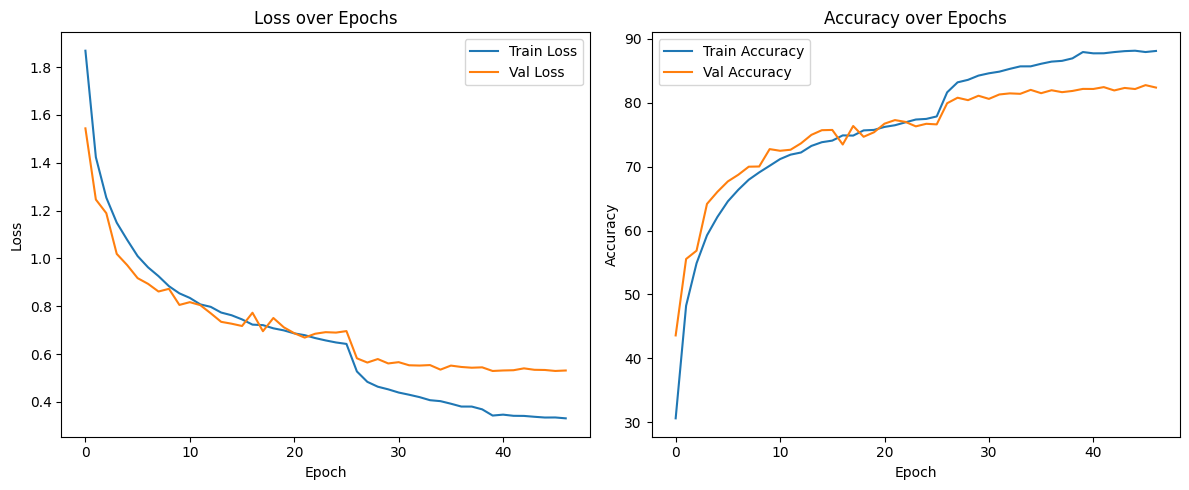

Files already downloaded and verified
Classification Report:
              precision    recall  f1-score   support

    airplane       0.83      0.85      0.84      1000
  automobile       0.93      0.91      0.92      1000
        bird       0.79      0.71      0.75      1000
         cat       0.62      0.67      0.65      1000
        deer       0.79      0.79      0.79      1000
         dog       0.76      0.70      0.73      1000
        frog       0.84      0.88      0.86      1000
       horse       0.86      0.86      0.86      1000
        ship       0.89      0.90      0.89      1000
       truck       0.87      0.90      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



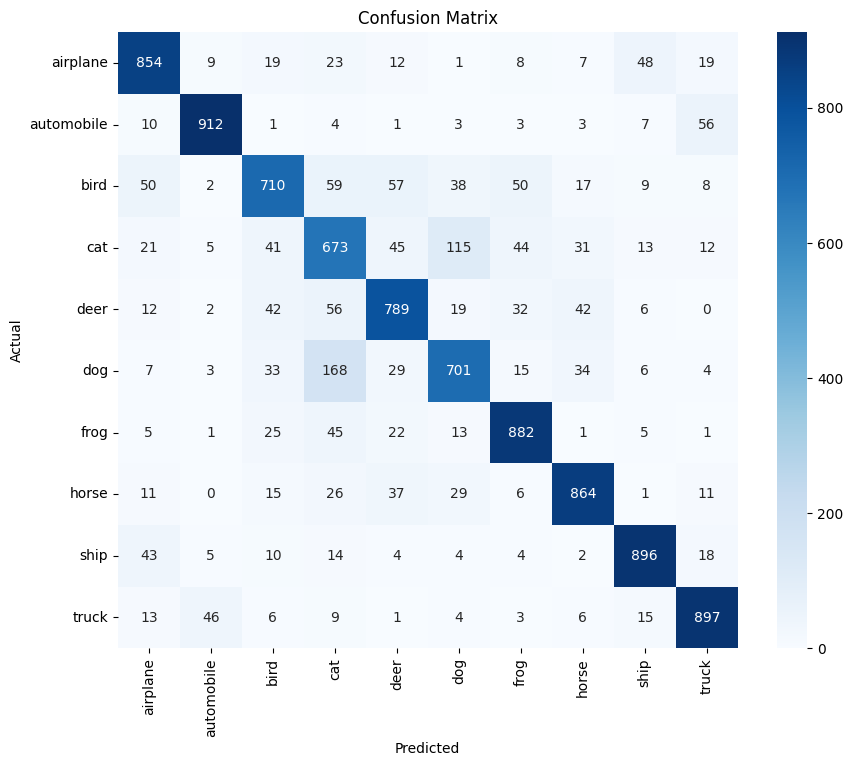

In [41]:
# Clear CUDA cache to prevent memory errors and set device
torch.cuda.empty_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize(224),  # Resize CIFAR-10 images to 224x224 to match AlexNet input size
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Get indices and labels of the dataset
indices = np.arange(len(train_dataset))
targets = np.array(train_dataset.targets)

# Perform stratified train-validation split (80:20)
train_indices, val_indices = train_test_split(indices, test_size=0.2, stratify=targets, random_state=42)

# Create subset datasets for training and validation
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Create DataLoaders
train_loader = DataLoader(train_subset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_subset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)

# Load ResNet18 AlexNet (without pretrained weights)
AlexNet = models.alexnet(weights=None)
AlexNet.classifier[6] = nn.Linear(AlexNet.classifier[6].in_features, 10)  # Since CIFAR-10 has 10 classes
AlexNet = AlexNet.to(device, non_blocking=True)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(AlexNet.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization with weight decay

# Scheduler to reduce learning rate when validation loss plateaus
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

# Early stopping parameters
early_stopping_patience = 7
best_val_loss = np.inf
early_stopping_counter = 0

# AMP: Initialize GradScaler for mixed precision training
scaler = torch.amp.GradScaler('cuda')

# Function to calculate accuracy
def accuracy(output, target):
    _, preds = torch.max(output, 1)
    return torch.sum(preds == target).item() / len(target)

# Training loop
num_epochs = 50
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
start_time = time.time()
best_AlexNet_weights = AlexNet.state_dict()

for epoch in range(num_epochs):
    AlexNet.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = AlexNet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    AlexNet.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = AlexNet(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Print epoch statistics
    print(f'Epoch [{epoch+1}/{num_epochs}], LR: {optimizer.param_groups[0]["lr"]:.6f}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    # Step the scheduler
    scheduler.step(val_loss)

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0  # Reset counter if validation loss improves
        best_AlexNet_weights = AlexNet.state_dict()
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered!")
            break

# Total time taken for training
end_time = time.time()
print(f"Training completed in: {(end_time - start_time) / 60:.2f} minutes")
# Load the best AlexNet weights
AlexNet.load_state_dict(best_AlexNet_weights)
# Save the trained AlexNet model
torch.save(AlexNet, 'AlexNet.pt')

# Plot the training and validation loss/accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Test set evaluation
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)
AlexNet.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device, non_blocking = True), labels.to(device, non_blocking = True)
        outputs = AlexNet(inputs)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Files already downloaded and verified
Epoch [1/50], LR: 0.010000, Train Loss: 12973.1197, Train Acc: 10.1200, Val Loss: 2.3050, Val Acc: 10.0000
Epoch [2/50], LR: 0.010000, Train Loss: 2.3053, Train Acc: 9.9675, Val Loss: 2.3041, Val Acc: 10.0000
Epoch [3/50], LR: 0.010000, Train Loss: 330.1739, Train Acc: 9.8975, Val Loss: 2.3036, Val Acc: 10.0000
Epoch [4/50], LR: 0.010000, Train Loss: 2.3036, Train Acc: 10.1850, Val Loss: 2.3036, Val Acc: 10.0000
Epoch [5/50], LR: 0.010000, Train Loss: 2.3036, Train Acc: 10.0250, Val Loss: 2.3028, Val Acc: 10.0000
Epoch [6/50], LR: 0.010000, Train Loss: 2.3035, Train Acc: 10.1250, Val Loss: 2.3032, Val Acc: 10.0000
Epoch [7/50], LR: 0.010000, Train Loss: 203919.0639, Train Acc: 9.7600, Val Loss: 2.3048, Val Acc: 10.0000
Epoch [8/50], LR: 0.010000, Train Loss: 3.0168, Train Acc: 10.0150, Val Loss: 2.3040, Val Acc: 10.0000
Epoch [9/50], LR: 0.010000, Train Loss: 2.9207, Train Acc: 10.0550, Val Loss: 2.3046, Val Acc: 10.0000
Epoch [10/50], LR: 0.001000

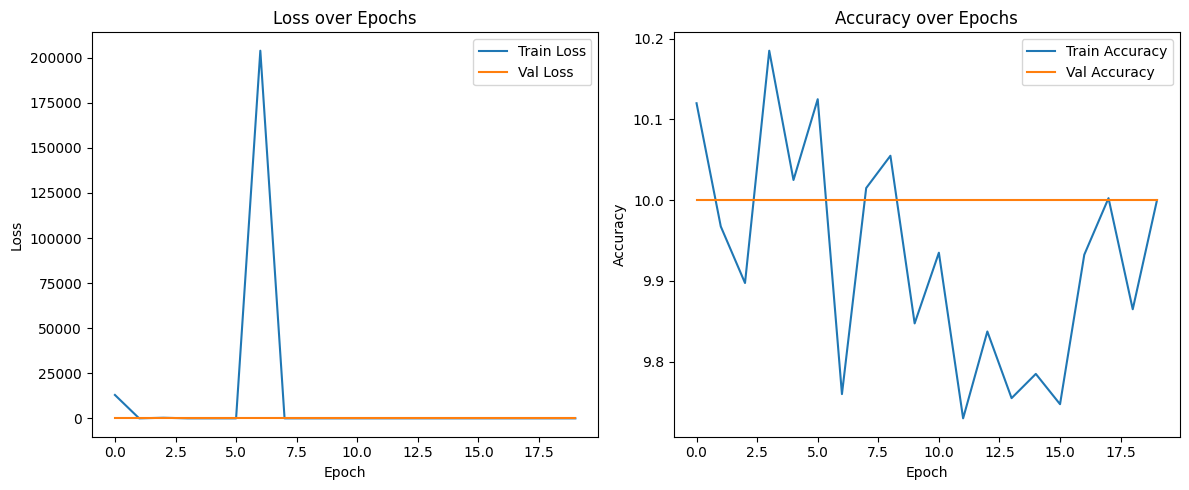

Files already downloaded and verified
Classification Report:
              precision    recall  f1-score   support

    airplane       0.10      1.00      0.18      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.00      0.00      0.00      1000
         cat       0.00      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.00      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000
        ship       0.00      0.00      0.00      1000
       truck       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



c:\Users\kalya\anaconda3\envs\protomedia_cv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kalya\anaconda3\envs\protomedia_cv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kalya\anaconda3\envs\protomedia_cv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

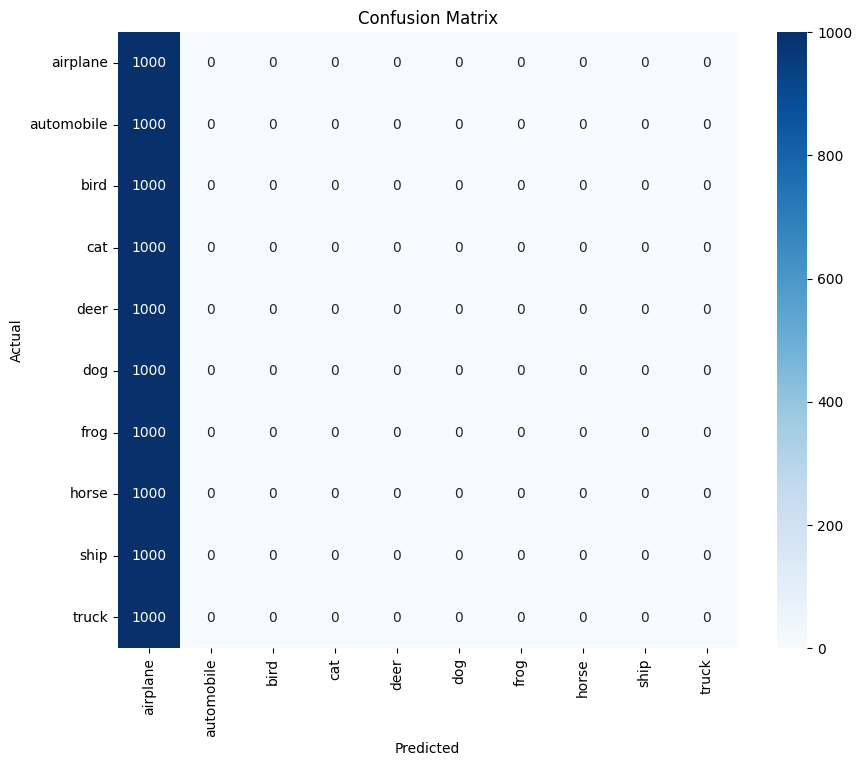

In [ ]:
# Clear CUDA cache to prevent memory errors and set device
torch.cuda.empty_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize(224),  # Resize CIFAR-10 images to 224x224 to match AlexNet input size
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Get indices and labels of the dataset
indices = np.arange(len(train_dataset))
targets = np.array(train_dataset.targets)

# Perform stratified train-validation split (80:20)
train_indices, val_indices = train_test_split(indices, test_size=0.2, stratify=targets, random_state=42)

# Create subset datasets for training and validation
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Create DataLoaders
train_loader = DataLoader(train_subset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_subset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)

# Load ResNet18 AlexNet (without pretrained weights)
AlexNet = models.alexnet(weights=None)
AlexNet.classifier[6] = nn.Linear(AlexNet.classifier[6].in_features, 10)  # Since CIFAR-10 has 10 classes
AlexNet = AlexNet.to(device, non_blocking=True)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(AlexNet.parameters(), lr=0.01, weight_decay=1e-4)  # L2 regularization with weight decay

# Scheduler to reduce learning rate when validation loss plateaus
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

# Early stopping parameters
early_stopping_patience = 7
best_val_loss = np.inf
early_stopping_counter = 0

# AMP: Initialize GradScaler for mixed precision training
scaler = torch.amp.GradScaler('cuda')

# Function to calculate accuracy
def accuracy(output, target):
    _, preds = torch.max(output, 1)
    return torch.sum(preds == target).item() / len(target)

# Training loop
num_epochs = 50
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
start_time = time.time()
best_AlexNet_weights = AlexNet.state_dict()

for epoch in range(num_epochs):
    AlexNet.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = AlexNet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    AlexNet.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = AlexNet(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Print epoch statistics
    print(f'Epoch [{epoch+1}/{num_epochs}], LR: {optimizer.param_groups[0]["lr"]:.6f}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    # Step the scheduler
    scheduler.step(val_loss)

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0  # Reset counter if validation loss improves
        best_AlexNet_weights = AlexNet.state_dict()
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered!")
            break

# Total time taken for training
end_time = time.time()
print(f"Training completed in: {(end_time - start_time) / 60:.2f} minutes")
# Load the best AlexNet weights
AlexNet.load_state_dict(best_AlexNet_weights)
# Save the trained AlexNet model
torch.save(AlexNet, 'AlexNet_lr_0.01.pt')

# Plot the training and validation loss/accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Test set evaluation
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)
AlexNet.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device, non_blocking = True), labels.to(device, non_blocking = True)
        outputs = AlexNet(inputs)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# MobileNet V2

Files already downloaded and verified
Epoch [1/50], LR: 0.001000, Train Loss: 1.7636, Train Acc: 0.3346, Val Loss: 1.5577, Val Acc: 0.4302
Epoch [2/50], LR: 0.001000, Train Loss: 1.3602, Train Acc: 0.5060, Val Loss: 1.2486, Val Acc: 0.5462
Epoch [3/50], LR: 0.001000, Train Loss: 1.1407, Train Acc: 0.5931, Val Loss: 1.1109, Val Acc: 0.6042
Epoch [4/50], LR: 0.001000, Train Loss: 1.0069, Train Acc: 0.6437, Val Loss: 1.0027, Val Acc: 0.6430
Epoch [5/50], LR: 0.001000, Train Loss: 0.9051, Train Acc: 0.6828, Val Loss: 0.9857, Val Acc: 0.6586
Epoch [6/50], LR: 0.001000, Train Loss: 0.8272, Train Acc: 0.7095, Val Loss: 0.8163, Val Acc: 0.7068
Epoch [7/50], LR: 0.001000, Train Loss: 0.7591, Train Acc: 0.7338, Val Loss: 0.7787, Val Acc: 0.7231
Epoch [8/50], LR: 0.001000, Train Loss: 0.7010, Train Acc: 0.7536, Val Loss: 0.7717, Val Acc: 0.7351
Epoch [9/50], LR: 0.001000, Train Loss: 0.6611, Train Acc: 0.7713, Val Loss: 0.6807, Val Acc: 0.7618
Epoch [10/50], LR: 0.001000, Train Loss: 0.6312, Trai

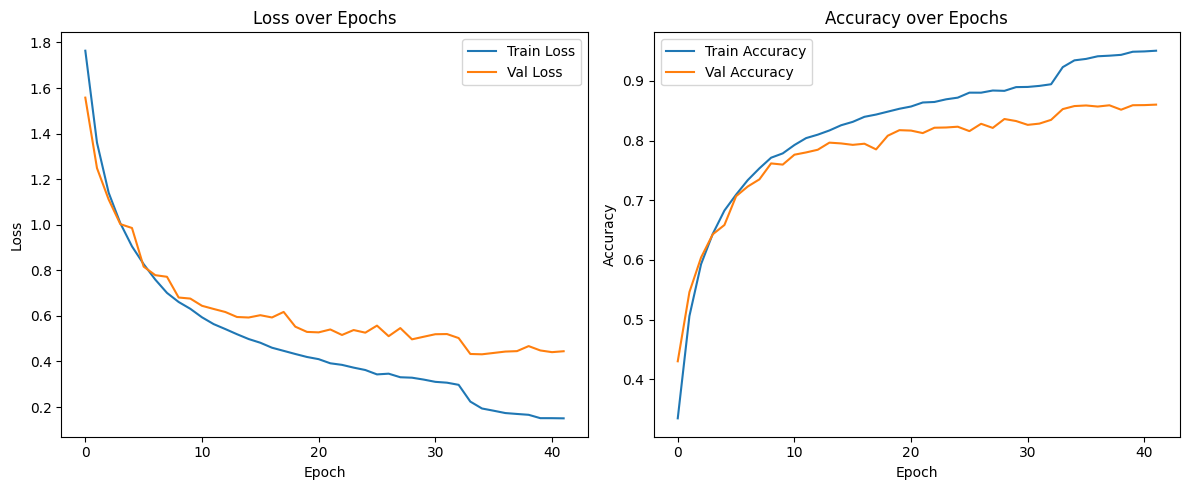

Files already downloaded and verified
Classification Report:
              precision    recall  f1-score   support

    airplane       0.86      0.89      0.87      1000
  automobile       0.93      0.93      0.93      1000
        bird       0.80      0.80      0.80      1000
         cat       0.70      0.71      0.71      1000
        deer       0.83      0.85      0.84      1000
         dog       0.80      0.77      0.78      1000
        frog       0.89      0.88      0.88      1000
       horse       0.90      0.89      0.89      1000
        ship       0.93      0.93      0.93      1000
       truck       0.92      0.92      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



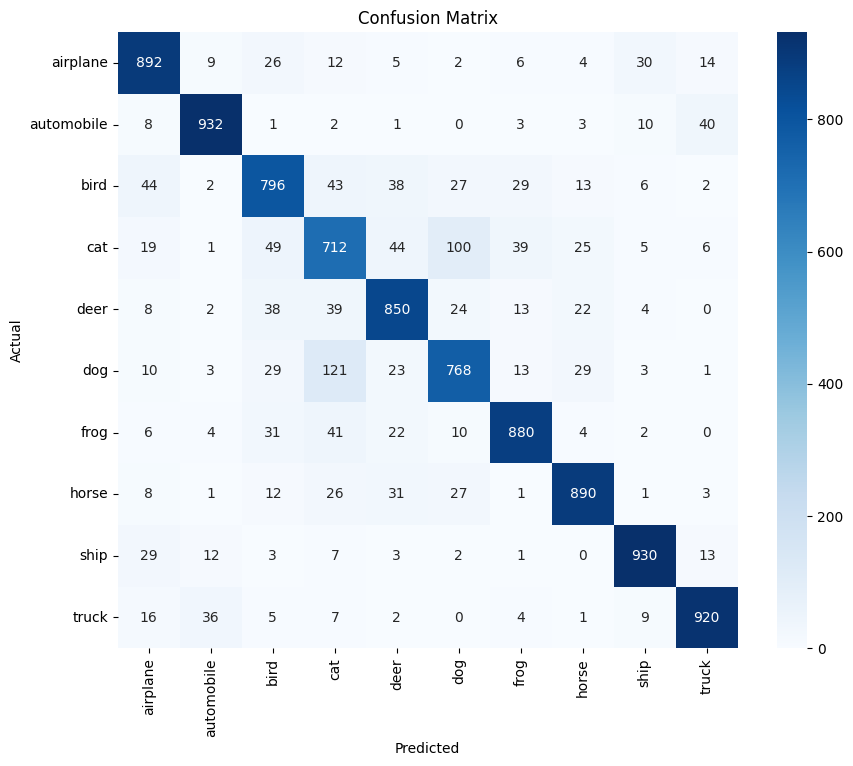

In [42]:
# Clear CUDA cache to prevent memory errors and set device
torch.cuda.empty_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize(224),  # Resize CIFAR-10 images to 224x224 to match ResNet18 input size
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Get indices and labels of the dataset
indices = np.arange(len(train_dataset))
targets = np.array(train_dataset.targets)

# Perform stratified train-validation split (80:20)
train_indices, val_indices = train_test_split(indices, test_size=0.2, stratify=targets, random_state=42)

# Create subset datasets for training and validation
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Create DataLoaders
train_loader = DataLoader(train_subset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_subset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)

# Load ResNet18 MobileNet (without pretrained weights)
MobileNet = models.mobilenet_v2(width_mult = 0.25, weights=None)
MobileNet.classifier[1] = nn.Linear(MobileNet.classifier[1].in_features, 10)  # Since CIFAR-10 has 10 classes
MobileNet = MobileNet.to(device, non_blocking=True)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(MobileNet.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization with weight decay

# Scheduler to reduce learning rate when validation loss plateaus
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)
best_MobileNet_weights = MobileNet.state_dict()

# Early stopping parameters
early_stopping_patience = 7
best_val_loss = np.inf
early_stopping_counter = 0

# AMP: Initialize GradScaler for mixed precision training
scaler = torch.amp.GradScaler('cuda')

# Function to calculate accuracy
def accuracy(output, target):
    _, preds = torch.max(output, 1)
    return torch.sum(preds == target).item() / len(target)

# Training loop
num_epochs = 50
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
start_time = time.time()

for epoch in range(num_epochs):
    # Training phase
    MobileNet.train()
    running_train_loss = 0.0
    running_train_acc = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device, non_blocking = True), labels.to(device, non_blocking = True)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass with autocast for mixed precision
        with torch.amp.autocast('cuda'):
            outputs = MobileNet(images)
            loss = criterion(outputs, labels)
        
        # Backward pass with scaled gradients
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        # Calculate training statistics
        running_train_loss += loss.item() * images.size(0)
        running_train_acc += accuracy(outputs, labels) * images.size(0)
    
    train_loss = running_train_loss / len(train_loader.dataset)
    train_acc = running_train_acc / len(train_loader.dataset)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation phase
    MobileNet.eval()
    running_val_loss = 0.0
    running_val_acc = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device, non_blocking = True), labels.to(device, non_blocking = True)
            
            # Forward pass with autocast for mixed precision
            with torch.amp.autocast('cuda'):
                outputs = MobileNet(images)
                loss = criterion(outputs, labels)
            
            # Calculate validation statistics
            running_val_loss += loss.item() * images.size(0)
            running_val_acc += accuracy(outputs, labels) * images.size(0)
    
    val_loss = running_val_loss / len(val_loader.dataset)
    val_acc = running_val_acc / len(val_loader.dataset)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Print epoch statistics
    print(f'Epoch [{epoch+1}/{num_epochs}], LR: {optimizer.param_groups[0]["lr"]:.6f}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    # Step the scheduler
    scheduler.step(val_loss)

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0  # Reset counter if validation loss improves
        best_MobileNet_weights = MobileNet.state_dict()
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered!")
            break

# Total time taken for training
end_time = time.time()
print(f"Training completed in: {(end_time - start_time) / 60:.2f} minutes")
# Load the best MobileNet weights
MobileNet.load_state_dict(best_MobileNet_weights)
# Save the trained MobileNet model
torch.save(MobileNet, 'MobileNet.pt')

# Plot the training and validation loss/accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
torch.save(MobileNet, 'MobileNet.pt')

# Test set evaluation
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)
MobileNet.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device, non_blocking = True), labels.to(device, non_blocking = True)
        outputs = MobileNet(inputs)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ShuffleNet

Files already downloaded and verified
Epoch [1/50], LR: 0.001000, Train Loss: 1.6918, Train Acc: 0.3700, Val Loss: 1.5181, Val Acc: 0.4332
Epoch [2/50], LR: 0.001000, Train Loss: 1.3595, Train Acc: 0.5013, Val Loss: 1.3429, Val Acc: 0.5018
Epoch [3/50], LR: 0.001000, Train Loss: 1.1600, Train Acc: 0.5753, Val Loss: 1.1268, Val Acc: 0.5924
Epoch [4/50], LR: 0.001000, Train Loss: 1.0017, Train Acc: 0.6402, Val Loss: 0.9772, Val Acc: 0.6501
Epoch [5/50], LR: 0.001000, Train Loss: 0.8855, Train Acc: 0.6851, Val Loss: 0.8972, Val Acc: 0.6800
Epoch [6/50], LR: 0.001000, Train Loss: 0.7951, Train Acc: 0.7185, Val Loss: 0.7899, Val Acc: 0.7185
Epoch [7/50], LR: 0.001000, Train Loss: 0.7246, Train Acc: 0.7454, Val Loss: 0.7456, Val Acc: 0.7421
Epoch [8/50], LR: 0.001000, Train Loss: 0.6712, Train Acc: 0.7638, Val Loss: 0.6982, Val Acc: 0.7586
Epoch [9/50], LR: 0.001000, Train Loss: 0.6237, Train Acc: 0.7810, Val Loss: 0.6689, Val Acc: 0.7689
Epoch [10/50], LR: 0.001000, Train Loss: 0.5828, Trai

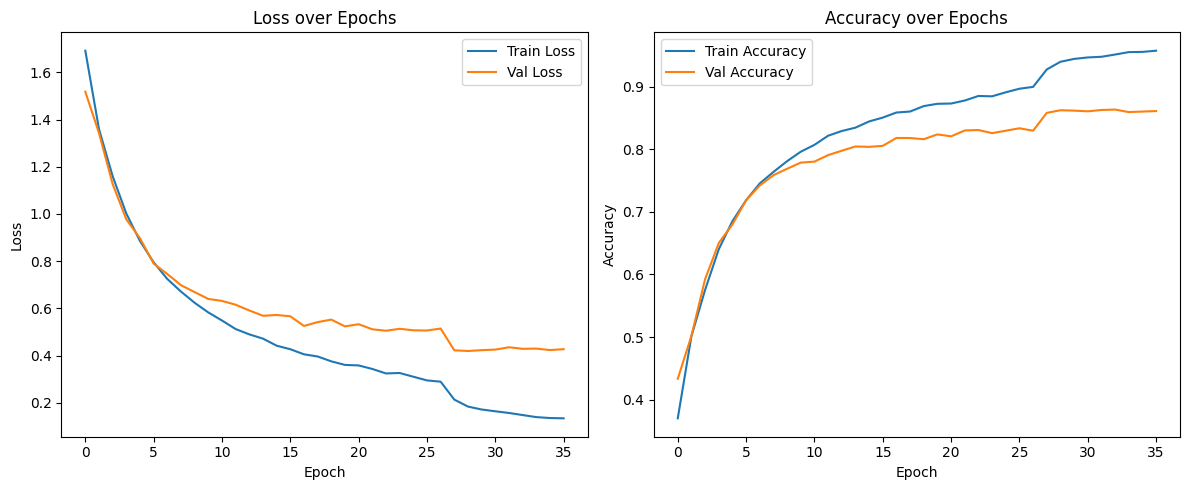

Files already downloaded and verified
Classification Report:
              precision    recall  f1-score   support

    airplane       0.89      0.88      0.88      1000
  automobile       0.93      0.94      0.93      1000
        bird       0.81      0.79      0.80      1000
         cat       0.72      0.71      0.71      1000
        deer       0.84      0.84      0.84      1000
         dog       0.78      0.78      0.78      1000
        frog       0.87      0.91      0.89      1000
       horse       0.90      0.88      0.89      1000
        ship       0.93      0.93      0.93      1000
       truck       0.91      0.92      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



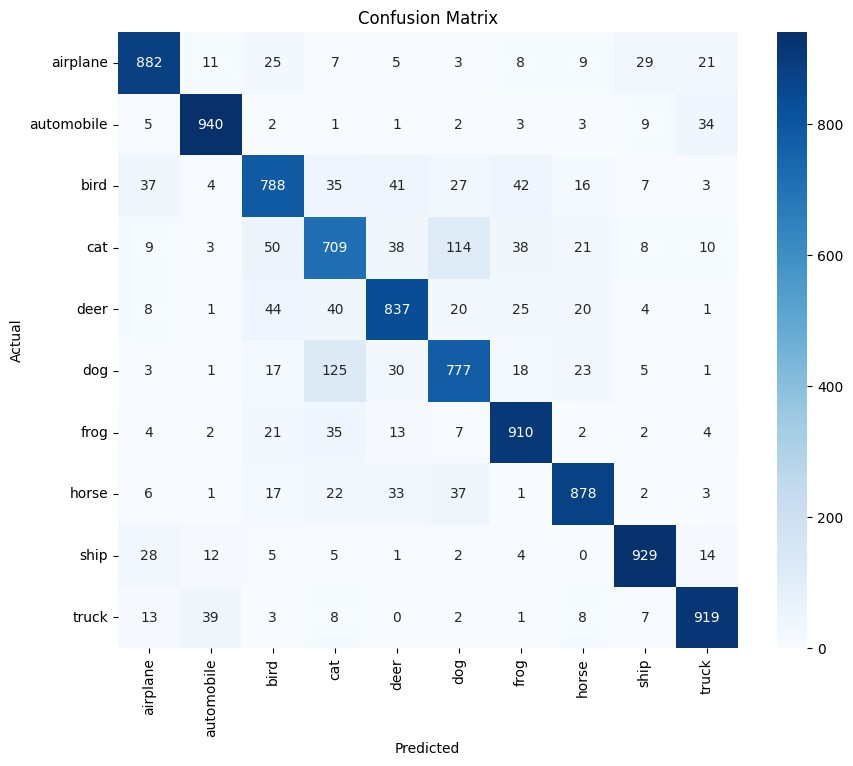

In [43]:
# Clear CUDA cache to prevent memory errors and set device
torch.cuda.empty_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize(224),  # Resize CIFAR-10 images to 224x224 to match ResNet18 input size
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Get indices and labels of the dataset
indices = np.arange(len(train_dataset))
targets = np.array(train_dataset.targets)

# Perform stratified train-validation split (80:20)
train_indices, val_indices = train_test_split(indices, test_size=0.2, stratify=targets, random_state=42)

# Create subset datasets for training and validation
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Create DataLoaders
train_loader = DataLoader(train_subset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_subset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)

# Load ResNet18 ShuffleNet (without pretrained weights)
ShuffleNet = models.shufflenet_v2_x0_5(weights=None)
ShuffleNet.fc = nn.Linear(ShuffleNet.fc.in_features, 10)
ShuffleNet = ShuffleNet.to(device, non_blocking=True)
best_ShuffleNet_weights = ShuffleNet.state_dict()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(ShuffleNet.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization with weight decay

# Scheduler to reduce learning rate when validation loss plateaus
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

# Early stopping parameters
early_stopping_patience = 7
best_val_loss = np.inf
early_stopping_counter = 0

# AMP: Initialize GradScaler for mixed precision training
scaler = torch.amp.GradScaler('cuda')

# Function to calculate accuracy
def accuracy(output, target):
    _, preds = torch.max(output, 1)
    return torch.sum(preds == target).item() / len(target)

# Training loop
num_epochs = 50
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
start_time = time.time()

for epoch in range(num_epochs):
    # Training phase
    ShuffleNet.train()
    running_train_loss = 0.0
    running_train_acc = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device, non_blocking = True), labels.to(device, non_blocking = True)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass with autocast for mixed precision
        with torch.amp.autocast('cuda'):
            outputs = ShuffleNet(images)
            loss = criterion(outputs, labels)
        
        # Backward pass with scaled gradients
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        # Calculate training statistics
        running_train_loss += loss.item() * images.size(0)
        running_train_acc += accuracy(outputs, labels) * images.size(0)
    
    train_loss = running_train_loss / len(train_loader.dataset)
    train_acc = running_train_acc / len(train_loader.dataset)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation phase
    ShuffleNet.eval()
    running_val_loss = 0.0
    running_val_acc = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device, non_blocking = True), labels.to(device, non_blocking = True)
            
            # Forward pass with autocast for mixed precision
            with torch.amp.autocast('cuda'):
                outputs = ShuffleNet(images)
                loss = criterion(outputs, labels)
            
            # Calculate validation statistics
            running_val_loss += loss.item() * images.size(0)
            running_val_acc += accuracy(outputs, labels) * images.size(0)
    
    val_loss = running_val_loss / len(val_loader.dataset)
    val_acc = running_val_acc / len(val_loader.dataset)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Print epoch statistics
    print(f'Epoch [{epoch+1}/{num_epochs}], LR: {optimizer.param_groups[0]["lr"]:.6f}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    # Step the scheduler
    scheduler.step(val_loss)

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0  # Reset counter if validation loss improves
        best_ShuffleNet_weights = ShuffleNet.state_dict()
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered!")
            break

# Total time taken for training
end_time = time.time()
print(f"Training completed in: {(end_time - start_time) / 60:.2f} minutes")
# Load the best ShuffleNet weights
ShuffleNet.load_state_dict(best_ShuffleNet_weights)

# Plot the training and validation loss/accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
torch.save(ShuffleNet, 'ShuffleNet.pt')

# Test set evaluation
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)
ShuffleNet.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device, non_blocking = True), labels.to(device, non_blocking = True)
        outputs = ShuffleNet(inputs)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ResNet-18

Files already downloaded and verified
Epoch [1/50], LR: 0.001000, Train Loss: 1.4179, Train Acc: 0.4822, Val Loss: 1.3905, Val Acc: 0.5173
Epoch [2/50], LR: 0.001000, Train Loss: 0.9402, Train Acc: 0.6640, Val Loss: 1.1305, Val Acc: 0.6127
Epoch [3/50], LR: 0.001000, Train Loss: 0.7439, Train Acc: 0.7364, Val Loss: 0.9579, Val Acc: 0.6828
Epoch [4/50], LR: 0.001000, Train Loss: 0.6325, Train Acc: 0.7769, Val Loss: 0.7632, Val Acc: 0.7331
Epoch [5/50], LR: 0.001000, Train Loss: 0.5610, Train Acc: 0.8073, Val Loss: 0.6886, Val Acc: 0.7633
Epoch [6/50], LR: 0.001000, Train Loss: 0.5093, Train Acc: 0.8232, Val Loss: 0.6092, Val Acc: 0.7835
Epoch [7/50], LR: 0.001000, Train Loss: 0.4741, Train Acc: 0.8373, Val Loss: 0.5875, Val Acc: 0.7921
Epoch [8/50], LR: 0.001000, Train Loss: 0.4432, Train Acc: 0.8449, Val Loss: 0.7781, Val Acc: 0.7480
Epoch [9/50], LR: 0.001000, Train Loss: 0.4108, Train Acc: 0.8579, Val Loss: 0.5981, Val Acc: 0.8009
Epoch [10/50], LR: 0.001000, Train Loss: 0.3795, Trai

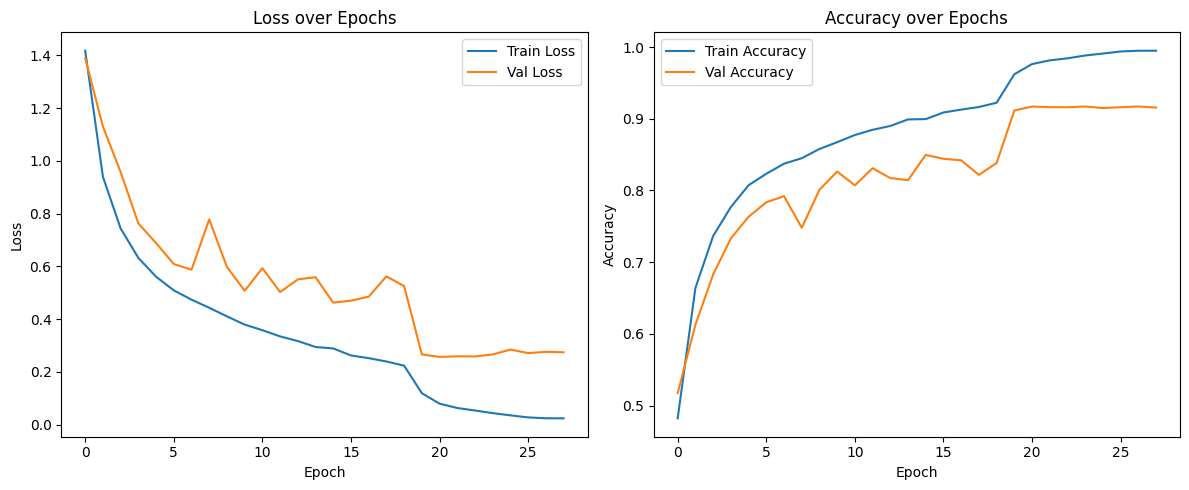

Files already downloaded and verified
Classification Report:
              precision    recall  f1-score   support

    airplane       0.92      0.93      0.93      1000
  automobile       0.95      0.96      0.96      1000
        bird       0.88      0.90      0.89      1000
         cat       0.85      0.81      0.83      1000
        deer       0.90      0.93      0.91      1000
         dog       0.87      0.87      0.87      1000
        frog       0.94      0.94      0.94      1000
       horse       0.96      0.94      0.95      1000
        ship       0.95      0.96      0.95      1000
       truck       0.95      0.94      0.95      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



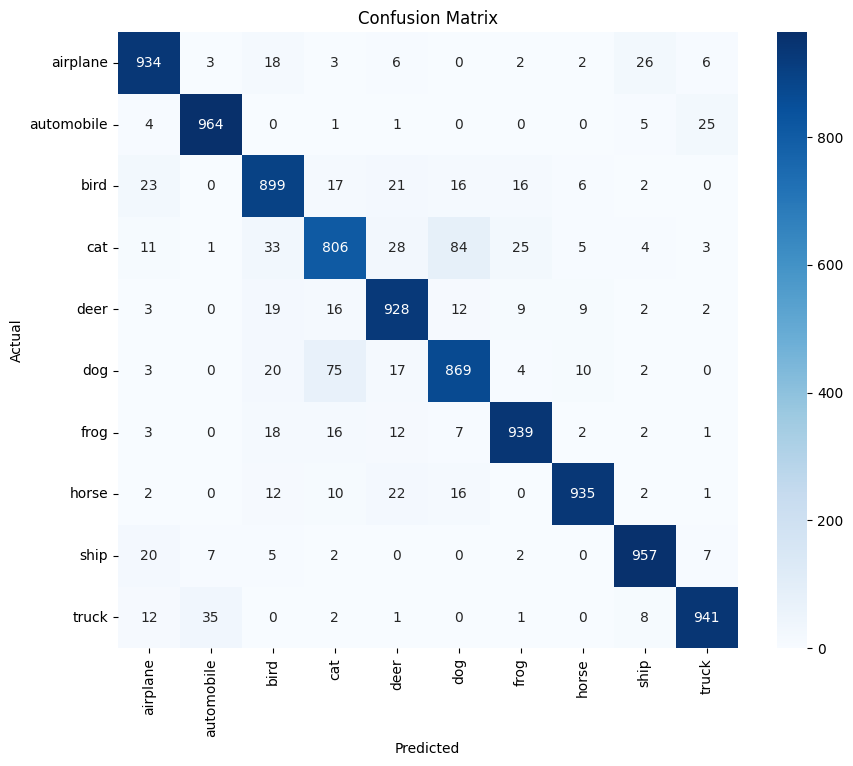

In [44]:
# Clear CUDA cache to prevent memory errors and set device
torch.cuda.empty_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize(224),  # Resize CIFAR-10 images to 224x224 to match ResNet18 input size
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Get indices and labels of the dataset
indices = np.arange(len(train_dataset))
targets = np.array(train_dataset.targets)

# Perform stratified train-validation split (80:20)
train_indices, val_indices = train_test_split(indices, test_size=0.2, stratify=targets, random_state=42)

# Create subset datasets for training and validation
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)

# Create DataLoaders
train_loader = DataLoader(train_subset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_subset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)

# Load ResNet18 model (without pretrained weights)
model = models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, 10)  # Since CIFAR-10 has 10 classes
model = model.to(device, non_blocking=True)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization with weight decay

# Scheduler to reduce learning rate when validation loss plateaus
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

# Early stopping parameters
early_stopping_patience = 7
best_val_loss = np.inf
early_stopping_counter = 0

# AMP: Initialize GradScaler for mixed precision training
scaler = torch.amp.GradScaler('cuda')

# Function to calculate accuracy
def accuracy(output, target):
    _, preds = torch.max(output, 1)
    return torch.sum(preds == target).item() / len(target)

# Training loop
num_epochs = 50
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
start_time = time.time()

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_train_loss = 0.0
    running_train_acc = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device, non_blocking = True), labels.to(device, non_blocking = True)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass with autocast for mixed precision
        with torch.amp.autocast('cuda'):
            outputs = model(images)
            loss = criterion(outputs, labels)
        
        # Backward pass with scaled gradients
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        # Calculate training statistics
        running_train_loss += loss.item() * images.size(0)
        running_train_acc += accuracy(outputs, labels) * images.size(0)
    
    train_loss = running_train_loss / len(train_loader.dataset)
    train_acc = running_train_acc / len(train_loader.dataset)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation phase
    model.eval()
    running_val_loss = 0.0
    running_val_acc = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device, non_blocking = True), labels.to(device, non_blocking = True)
            
            # Forward pass with autocast for mixed precision
            with torch.amp.autocast('cuda'):
                outputs = model(images)
                loss = criterion(outputs, labels)
            
            # Calculate validation statistics
            running_val_loss += loss.item() * images.size(0)
            running_val_acc += accuracy(outputs, labels) * images.size(0)
    
    val_loss = running_val_loss / len(val_loader.dataset)
    val_acc = running_val_acc / len(val_loader.dataset)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Print epoch statistics
    print(f'Epoch [{epoch+1}/{num_epochs}], LR: {optimizer.param_groups[0]["lr"]:.6f}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    # Step the scheduler
    scheduler.step(val_loss)

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0  # Reset counter if validation loss improves
        best_model_weights = model.state_dict()
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered!")
            break

# Total time taken for training
end_time = time.time()
print(f"Training completed in: {(end_time - start_time) / 60:.2f} minutes")
# Load the best model weights
model.load_state_dict(best_model_weights)

# Plot the training and validation loss/accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
torch.save(model, 'resnet_18_50epoch.pt')

# Test set evaluation
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device, non_blocking = True), labels.to(device, non_blocking = True)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()